In [1]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
customers = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/customers.csv')
properties = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/properties.csv ')

In [4]:
customers.head(20)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
5,5,C0088,Individual,Yurem,Wright,3/6/1957,M,USA,California,Home,3,Yes,Website
6,6,C0079,Individual,Xavier,Faulkner,5/24/1947,M,Canada,NaN,Investment,5,No,Website
7,7,C0149,Individual,Kayden,Olsen,10/17/1969,F,USA,California,Home,5,No,Website
8,8,C0064,Individual,Joaquin,Mullins,10/5/1975,M,USA,California,Investment,5,No,Agency
9,9,C0068,Individual,Nicolas,Navarro,6/17/1966,M,USA,Oregon,Investment,3,No,Agency


In [5]:
customers.tail(20)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
142,142,C0130,Individual,Ezra,Lozano,2/24/1958,M,USA,California,Home,1,No,Website
143,143,C0044,Individual,Ramiro,Oneill,9/29/1954,M,USA,California,Home,4,No,Agency
144,144,C0056,Individual,Emely,Watts,11/30/1964,F,USA,California,Home,4,No,Website
145,145,C0077,Individual,Hazel,Ayers,2/1/1963,M,USA,Colorado,Home,2,No,Website
146,146,C0031,Individual,Cedric,Goodwin,2/20/1948,M,USA,Utah,Home,4,No,Client
147,147,C0072,Individual,Dayton,Hatfield,4/19/1969,M,USA,Colorado,Investment,4,Yes,Agency
148,148,C0063,Individual,Piotr,Aleksandrov,12/2/1955,M,Russia,NaN,Investment,3,No,Agency
149,149,C0017,Individual,Memphis,Mcconnell,8/25/1968,M,USA,California,Home,2,Yes,Website
150,150,C0009,Individual,Arabella,Ferrell,8/17/1976,F,USA,Oregon,Home,1,No,Agency
151,151,C0075,Individual,Sincere,Hansen,1/19/1967,F,USA,California,Investment,2,Yes,Agency


In [6]:
properties

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...,...
262,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    object
 2   entity             162 non-null    object
 3   name               162 non-null    object
 4   surname            162 non-null    object
 5   birth_date         155 non-null    object
 6   sex                155 non-null    object
 7   country            162 non-null    object
 8   state              154 non-null    object
 9   purpose            162 non-null    object
 10  deal_satisfaction  162 non-null    int64 
 11  mortgage           162 non-null    object
 12  source             162 non-null    object
dtypes: int64(2), object(11)
memory usage: 16.6+ KB


In [8]:
customers.describe()

,Unnamed: 0,deal_satisfaction
count,162.000000,162.000000
mean,80.500000,3.456790
std,46.909487,1.333276
min,0.000000,1.000000
25%,40.250000,3.000000
50%,80.500000,4.000000
75%,120.750000,5.000000
max,161.000000,5.000000


In [9]:
customers.shape

(162, 13)

# Предобработка данных

In [10]:
print(customers.columns)

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [11]:
customers.dtypes

,0
Unnamed: 0,int64
﻿customerid,object
entity,object
name,object
surname,object
birth_date,object
sex,object
country,object
state,object
purpose,object


In [12]:

customers.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [13]:
customers


,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [14]:
customers.columns = ['customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source']

In [15]:
customers['customerid'] = customers['customerid'].str.replace('C', '')

In [16]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [17]:
customers['customerid'] = customers['customerid'].astype('int64')
customers['name'] = customers['name'].astype('string')
customers['surname'] = customers['surname'].astype('string')
customers['entity'] = customers['entity'].astype('string')
customers['sex'] = customers['sex'].astype('string')
customers['country'] = customers['country'].astype('string')
customers['state'] = customers['state'].astype('string')
customers['purpose'] = customers['purpose'].astype('string')
customers['mortgage'] = customers['mortgage'].astype('string')
customers['source'] = customers['source'].astype('string')

In [18]:
customers['birth_date'] = customers['birth_date'].astype('datetime64[ns]')

In [19]:
customers.dtypes

,0
customerid,int64
entity,string[python]
name,string[python]
surname,string[python]
birth_date,datetime64[ns]
sex,string[python]
country,string[python]
state,string[python]
purpose,string[python]
deal_satisfaction,int64


In [20]:

customers.rename(columns={'birth_date':'birthdate'}, inplace=True)

In [21]:
categorical_cols = ['entity',  'sex', 'country', 'state',
       'purpose', 'mortgage', 'source']

In [22]:
for col in categorical_cols:
  customers[col] = customers[col].str.lower()

In [23]:
customers

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,individual,Kareem,Liu,1968-05-11,f,usa,california,home,4,yes,website
1,10,individual,Trystan,Oconnor,1962-11-26,m,usa,california,home,1,no,website
2,132,individual,Kale,Gay,1959-04-07,m,usa,california,home,4,yes,agency
3,137,individual,Russell,Gross,1959-11-25,m,usa,california,home,5,no,website
4,174,company,Marleez,Co,NaT,<NA>,usa,california,investment,5,no,website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,individual,Emmy,Singh,1979-12-03,f,usa,virginia,investment,3,yes,agency
158,138,individual,Colin,Campos,1942-04-14,m,usa,california,home,3,no,website
159,113,individual,Anya,Stephenson,1959-06-11,f,usa,california,home,4,no,website
160,147,individual,Parker,Poole,1951-11-10,m,usa,california,home,5,no,website


In [24]:
label_encoder = LabelEncoder()

In [25]:
print(customers['entity'].unique())

<StringArray>
['individual', 'company']
Length: 2, dtype: string


In [26]:
customers['entity'].value_counts()

,count
entity,
individual,155
company,7


In [27]:
customers['entity'] = label_encoder.fit_transform(customers['entity'])
print(customers['entity'].unique())

[1 0]


In [28]:
customers['entity'].value_counts()

,count
entity,
1,155
0,7


In [29]:
print(customers['sex'].unique())


<StringArray>
['f', 'm', <NA>]
Length: 3, dtype: string


In [30]:
customers['sex'].value_counts()

,count
sex,
m,87
f,68


In [31]:
customers['sex'].fillna('Unknown', inplace=True)

/tmp/ipython-input-31-2553422267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['sex'].fillna('Unknown', inplace=True)


In [32]:
customers['sex'] = label_encoder.fit_transform(customers['sex'])
print(customers['sex'].unique())


[1 2 0]


In [33]:
customers['sex'].value_counts()

,count
sex,
2,87
1,68
0,7


In [34]:
customers['country'].unique()

<StringArray>
[    'usa',    'usa ',  'canada', 'germany', 'belgium',  'mexico',  'russia',
      'uk', 'denmark']
Length: 9, dtype: string

In [35]:
customers['country'] = customers['country'].str.strip().str.lower()

In [36]:
customers['country'].value_counts()

,count
country,
usa,150
russia,4
uk,2
belgium,2
germany,1
canada,1
mexico,1
denmark,1


In [37]:
print(customers['country'].unique())


<StringArray>
['usa', 'canada', 'germany', 'belgium', 'mexico', 'russia', 'uk', 'denmark']
Length: 8, dtype: string


In [38]:
customers['country'] = label_encoder.fit_transform(customers['country'])
print(customers['country'].unique())

[7 1 3 0 4 5 6 2]


In [39]:
customers['country'].iloc[0]

np.int64(7)

In [40]:
customers['country'].value_counts()

,count
country,
7,150
5,4
6,2
0,2
3,1
1,1
4,1
2,1


In [41]:
print(customers['state'].unique())

<StringArray>
['california',         <NA>,     'oregon',    'arizona',     'nevada',
   'colorado',       'utah',   'virginia',    'wyoming',     'kansas']
Length: 10, dtype: string


In [42]:
customers['state'].fillna('unknown',inplace=True)

/tmp/ipython-input-42-3480713955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['state'].fillna('unknown',inplace=True)


In [43]:
customers['state'].value_counts()

,count
state,
california,100
nevada,14
colorado,11
arizona,10
oregon,9
unknown,8
utah,5
virginia,3
wyoming,1


In [44]:
customers['state'] = label_encoder.fit_transform(customers['state'])
print(customers['state'].unique())

[1 6 5 0 4 2 7 8 9 3]


In [45]:
print(customers['purpose'].unique())

<StringArray>
['home', 'investment']
Length: 2, dtype: string


In [46]:
customers['purpose'].value_counts()

,count
purpose,
home,112
investment,50


In [47]:
customers['purpose'] = label_encoder.fit_transform(customers['purpose'])
print(customers['purpose'].unique())

[0 1]


In [48]:
customers['purpose'].value_counts()

,count
purpose,
0,112
1,50


In [49]:

print(customers['mortgage'].unique())

<StringArray>
['yes', 'no']
Length: 2, dtype: string


In [50]:
customers['mortgage'].value_counts()

,count
mortgage,
no,102
yes,60


In [51]:
customers['mortgage'] = label_encoder.fit_transform(customers['mortgage'])
print(customers['mortgage'].unique())

[1 0]


In [52]:
customers['purpose'].value_counts()

,count
purpose,
0,112
1,50


In [53]:
print(customers['source'].unique())


<StringArray>
['website', 'agency', 'client']
Length: 3, dtype: string


In [54]:
customers['source'].value_counts()

,count
source,
website,93
agency,54
client,15


In [55]:
customers['source'] = label_encoder.fit_transform(customers['source'])
print(customers['source'].unique())

[2 0 1]


In [56]:
customers['source'].value_counts()

,count
source,
2,93
0,54
1,15


In [57]:
customers['customerid'].unique()

array([110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133])

In [58]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    int64         
 1   entity             162 non-null    int64         
 2   name               162 non-null    string        
 3   surname            162 non-null    string        
 4   birthdate          155 non-null    datetime64[ns]
 5   sex                162 non-null    int64         
 6   country            162 non-null    int64         
 7   state              162 non-null    int64         
 8   purpose            162 non-null    int64         
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    int64         
 11  source             162 non-null    int64         
dtypes: datetime64[ns](1), int64(9), string(2)
memory usage: 15.3 KB


In [59]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,1,Kareem,Liu,1968-05-11,1,7,1,0,4,1,2
1,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2
2,132,1,Kale,Gay,1959-04-07,2,7,1,0,4,1,0
3,137,1,Russell,Gross,1959-11-25,2,7,1,0,5,0,2
4,174,0,Marleez,Co,NaT,0,7,1,1,5,0,2


In [60]:
# For customers dataframe
customers.isnull().sum()

,0
customerid,0
entity,0
name,0
surname,0
birthdate,7
sex,0
country,0
state,0
purpose,0
deal_satisfaction,0


In [61]:
missing_percentage = (customers.isnull().mean() * 100).round(2)
print(missing_percentage)

customerid           0.00
entity               0.00
name                 0.00
surname              0.00
birthdate            4.32
sex                  0.00
country              0.00
state                0.00
purpose              0.00
deal_satisfaction    0.00
mortgage             0.00
source               0.00
dtype: float64


<Axes: >

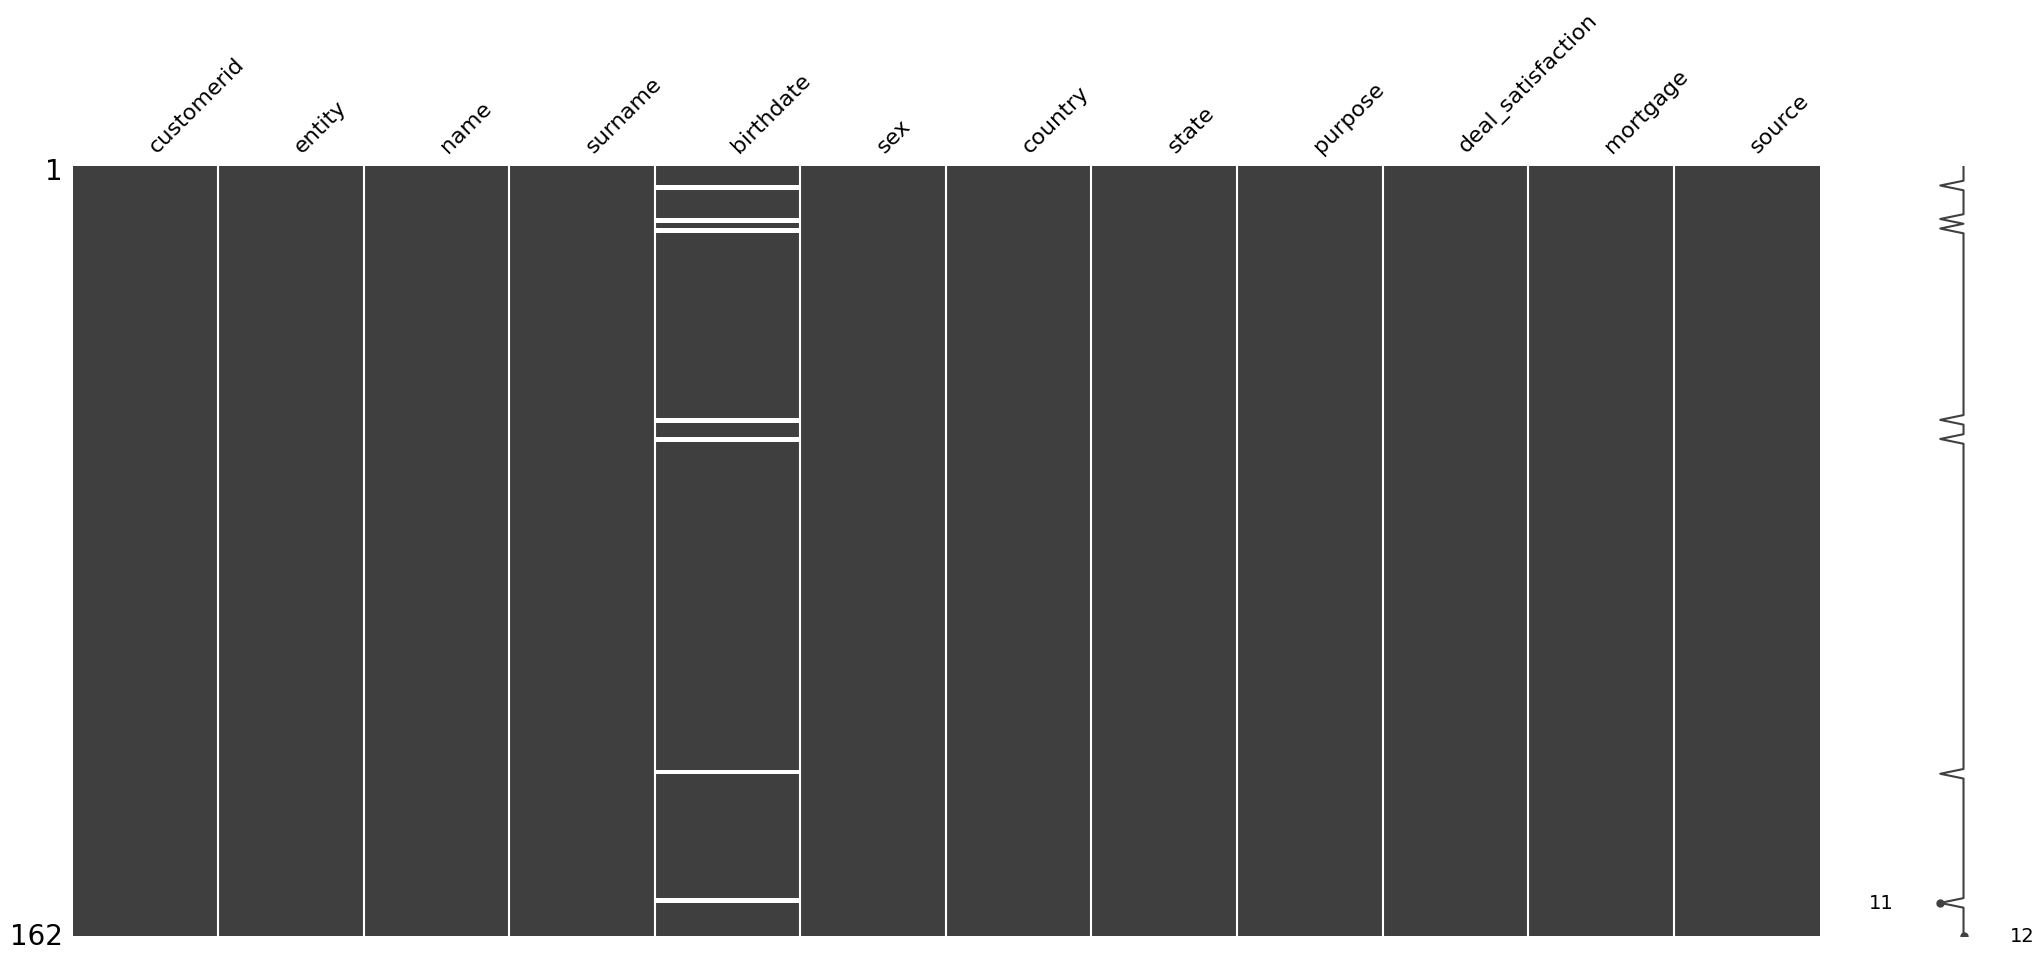

In [62]:
msno.matrix(customers)

In [63]:
customers.sort_values(by='birthdate', inplace=True)
customers['birthdate'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-63-1293684958.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['birthdate'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-63-1293684958.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers['birthdate'].fillna(method='ffill', inplace=True)


In [64]:
customers.shape

(162, 12)

In [65]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
43,104,1,Diana,Hunt,1931-02-13,1,7,0,0,3,0,2
133,21,1,Kaylin,Villarreal,1932-06-13,1,5,6,1,3,0,2
108,148,1,Myah,Roman,1933-05-05,1,7,1,1,5,1,0
56,172,1,Henry,Kennedy,1933-06-08,2,7,1,0,4,1,0
87,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2


In [66]:
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [67]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [68]:
print(properties.columns)

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')


In [69]:
properties.describe()

,Unnamed: 0,﻿id,building,property#,area
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,133.000000,2975.142322,2.947566,27.580524,936.221311
std,77.220464,1392.197474,1.391794,15.361437,284.894858
min,0.000000,1002.000000,1.000000,1.000000,410.710000
25%,66.500000,2015.500000,2.000000,14.500000,756.210000
50%,133.000000,3024.000000,3.000000,28.000000,798.280000
75%,199.500000,4031.500000,4.000000,40.000000,1121.950000
max,266.000000,5052.000000,5.000000,59.000000,1942.500000


In [70]:
properties.shape

(267, 10)

In [71]:

properties['customerid'] = properties['customerid'].str.replace('C', '')

In [72]:
properties.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [73]:
properties.rename(columns={'﻿id': 'id'}, inplace=True)

In [74]:

properties.drop(columns=['id'], inplace=True)

In [75]:
properties.dtypes

,0
building,int64
date_sale,object
type,object
property#,int64
area,float64
price,object
status,object
customerid,object


In [76]:
properties['customerid'].unique()

array([' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 013

In [77]:
properties['customerid'] = properties['customerid'].str.replace(r'\D', '', regex=True)
properties['customerid'] = properties['customerid'].astype(float).astype('Int64')  # Convert to Nullable Integer


In [78]:
# Define the list of possible imputation values
impute_values = [110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]

# Iterate through the DataFrame to replace NaN values
for value in impute_values:
    properties['customerid'].fillna(value=value, inplace=True)

# If there are still NaN values left, you can fill them with a default value, for example, -1
properties['customerid'].fillna(value=-1, inplace=True)

/tmp/ipython-input-78-2253316414.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  properties['customerid'].fillna(value=value, inplace=True)
/tmp/ipython-input-78-2253316414.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [79]:
properties['customerid'].unique()

<IntegerArray>
[ 28,  27, 112, 160,  14, 125, 166,  34, 170,   9,
 ...
 148, 172, 104,   1,  12,  25,  29,  55, 121, 174]
Length: 162, dtype: Int64

In [80]:

properties['type'] = properties['type'].astype('string')
properties['status'] = properties['status'].astype('string')

In [81]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'], format='%m/%d/%Y', errors='coerce')

In [82]:

properties['price'] = properties['price'].str.replace('$','').str.replace(',','').astype('float64')

In [83]:
properties.rename(columns={'property#':'property','date_sale':'datesale'},inplace=True )

In [84]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,28
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,27
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,112
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,160
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,14
5,3,2007-09-01,Apartment,11,675.19,203491.85,Sold,125
6,3,2007-09-01,Apartment,26,670.89,212520.83,Sold,125
7,3,2008-01-01,Apartment,23,720.81,198591.85,Sold,166
8,1,2006-06-01,Apartment,31,782.25,265467.68,Sold,34
9,4,2006-03-01,Apartment,23,794.52,235633.26,Sold,170


In [85]:
properties.dtypes

,0
building,int64
datesale,datetime64[ns]
type,string[python]
property,int64
area,float64
price,float64
status,string[python]
customerid,Int64


In [86]:
categorical_cols = ['status', 'type']

In [87]:
properties['status'] = properties['status'].str.lower()

In [88]:
properties['status'].unique()

<StringArray>
[' sold ', '-']
Length: 2, dtype: string

In [89]:
properties['status'] = properties['status'].replace('-', 'unknown')


In [90]:
properties['status'].value_counts()

,count
status,
sold,195
unknown,72


In [91]:
properties['status'] = label_encoder.fit_transform(properties['status'])

In [92]:
properties['status'].value_counts()

,count
status,
0,195
1,72


In [93]:
properties['status'].unique()

array([0, 1])

In [94]:
properties['type'] = properties['type'].str.lower()

In [95]:
properties['type'].unique()

<StringArray>
['apartment', 'office']
Length: 2, dtype: string

In [96]:
properties['type'].value_counts()

,count
type,
apartment,259
office,8


In [97]:

properties['type'] = label_encoder.fit_transform(properties['type'])

In [98]:
properties['type'].value_counts()

,count
type,
0,259
1,8


In [99]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,0,30,743.09,246172.68,0,28
1,1,2005-10-01,0,29,756.21,246331.90,0,27
2,2,2007-07-01,0,2,587.28,209280.91,0,112
3,2,2007-12-01,0,31,1604.75,452667.01,0,160
4,1,2004-11-01,0,49,1375.45,467083.31,0,14
5,3,2007-09-01,0,11,675.19,203491.85,0,125
6,3,2007-09-01,0,26,670.89,212520.83,0,125
7,3,2008-01-01,0,23,720.81,198591.85,0,166
8,1,2006-06-01,0,31,782.25,265467.68,0,34
9,4,2006-03-01,0,23,794.52,235633.26,0,170


In [100]:
properties.isna().sum()

,0
building,0
datesale,72
type,0
property,0
area,0
price,0
status,0
customerid,0


<Axes: >

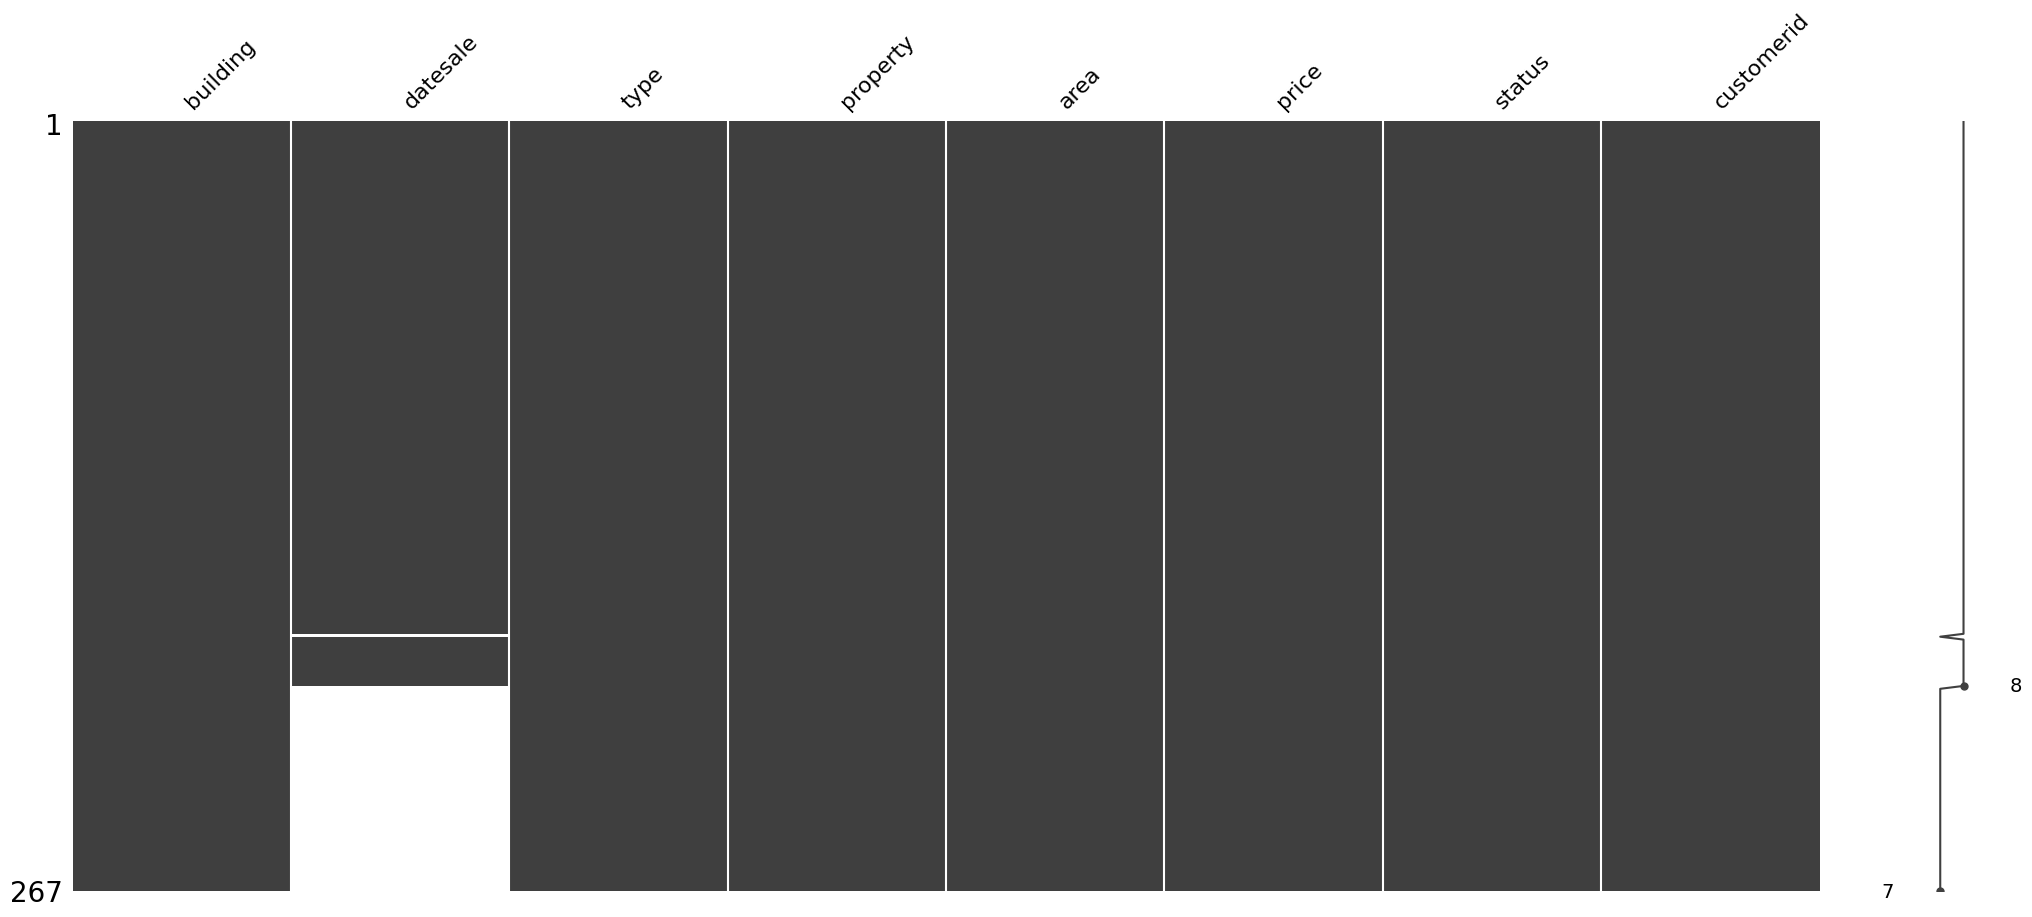

In [101]:
msno.matrix(properties)

In [102]:
missing_values = ((properties.isna().sum() * 100)/ properties.shape[0]).round()

In [103]:
print(missing_values)

building       0.0
datesale      27.0
type           0.0
property       0.0
area           0.0
price          0.0
status         0.0
customerid     0.0
dtype: float64


In [104]:
properties.sort_values(by='datesale', inplace=True)

In [105]:
properties['datesale'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-105-4063300883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  properties['datesale'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-105-4063300883.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  properties['datesale'].fillna(method='ffill', inplace=True)


In [106]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
137,1,2004-03-01,1,2,1238.58,410932.67,0,2
186,2,2004-03-01,0,1,587.28,169158.29,0,121
179,1,2004-03-01,1,5,410.71,117564.07,0,1
132,1,2004-06-01,0,44,827.87,229464.71,0,3
133,1,2004-06-01,0,43,1160.36,377313.56,0,4
83,1,2004-08-01,0,38,743.09,207581.43,0,6
164,1,2004-08-01,0,33,1434.09,412856.56,0,5
33,1,2004-10-01,0,18,625.80,191389.87,0,7
53,1,2004-10-01,0,35,827.87,238811.06,0,11
72,1,2004-10-01,0,45,756.21,248525.12,0,10


In [107]:
properties.isna().sum()

,0
building,0
datesale,0
type,0
property,0
area,0
price,0
status,0
customerid,0


In [108]:
properties['customerid']

,customerid
137,2
186,121
179,1
132,3
133,4
...,...
262,110
263,110
264,110
265,110


In [109]:
# Assuming 'customers' and 'properties' are your DataFrames
common_customer_ids = set(customers['customerid']).intersection(properties['customerid'])

if common_customer_ids:
    print("Common customer IDs found:")
    print(common_customer_ids)
else:
    print("No common customer IDs found.")

Common customer IDs found:
{np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(47), np.int64(48), np.int64(49), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), n

In [110]:

data  = customers.merge(properties, on='customerid', how='outer')

In [111]:
data.shape

(267, 19)

In [113]:
data.head(20)

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source,building,datesale,type,property,area,price,status
0,1,0,Kamd,Co,1986-06-21,0,7,1,1,5,0,0,1,2004-03-01,1,5,410.71,117564.07,0
1,2,1,Jack,Anderson,1947-02-13,2,7,1,1,5,1,2,1,2004-03-01,1,2,1238.58,410932.67,0
2,3,1,Avah,Huang,1948-04-23,1,7,1,0,5,0,2,1,2004-06-01,0,44,827.87,229464.71,0
3,4,1,Nora,Lynch,1948-04-23,1,7,1,0,5,0,2,1,2004-06-01,0,43,1160.36,377313.56,0
4,5,1,Rodolfo,Gibson,1937-01-20,2,7,4,0,2,1,2,1,2004-08-01,0,33,1434.09,412856.56,0
5,6,1,Laci,Guerra,1956-06-17,1,7,1,0,2,1,2,1,2004-08-01,0,38,743.09,207581.43,0
6,7,1,Jaelyn,Berger,1970-05-05,1,7,1,0,3,0,2,1,2004-10-01,0,18,625.80,191389.87,0
7,8,1,Arthur,Bray,1949-07-14,2,7,7,1,4,0,0,1,2004-10-01,0,21,756.21,218585.92,0
8,9,1,Arabella,Ferrell,1976-08-17,1,7,5,0,1,0,0,1,2004-10-01,0,36,1160.36,317473.86,0
9,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2,1,2004-10-01,0,45,756.21,248525.12,0


In [114]:
data.dtypes

,0
customerid,int64
entity,int64
name,string[python]
surname,string[python]
birthdate,datetime64[ns]
sex,int64
country,int64
state,int64
purpose,int64
deal_satisfaction,int64


In [115]:

data.to_csv('preprocessed_data.csv', index=False)

In [116]:
data = read_csv('preprocessed_data.csv')

NameError: name 'read_csv' is not defined

In [117]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,267.0,95.11985,1.0,64.0,110.0,116.5,175.0,44.340708
entity,267.0,0.93633,0.0,1.0,1.0,1.0,1.0,0.244623
birthdate,267,1964-08-14 20:02:41.797752800,1931-02-13 00:00:00,1958-03-21 00:00:00,1968-05-11 00:00:00,1969-08-09 12:00:00,1986-06-21 00:00:00,NaN
sex,267.0,1.340824,0.0,1.0,1.0,2.0,2.0,0.594413
country,267.0,6.707865,0.0,7.0,7.0,7.0,7.0,1.21892
state,267.0,1.872659,0.0,1.0,1.0,1.0,9.0,1.881519
purpose,267.0,0.284644,0.0,0.0,0.0,1.0,1.0,0.452092
deal_satisfaction,267.0,3.707865,1.0,3.0,4.0,5.0,5.0,1.158839
mortgage,267.0,0.501873,0.0,0.0,1.0,1.0,1.0,0.500935
source,267.0,1.494382,0.0,1.0,2.0,2.0,2.0,0.833377


In [118]:
building_types = data['building'].unique()

In [119]:
print(building_types)

[1 2 3 4 5]


In [120]:
totals_columns = ['building', 'price', 'mortgage']

In [121]:
totals_df = data[totals_columns]
totals_df

,building,price,mortgage
0,1,117564.07,0
1,1,410932.67,1
2,1,229464.71,0
3,1,377313.56,0
4,1,412856.56,1
...,...,...,...
262,1,206958.71,0
263,1,189194.31,0
264,1,210745.17,0
265,1,204027.09,0


In [122]:

# Group totals by building type and aggregate
totals_by_building = totals_df.groupby('building').sum()

In [123]:
totals_by_building

,price,mortgage
building,,
1,14307448.61,20
2,16339725.35,21
3,17668429.10,25
4,12480299.17,29
5,14276995.44,39


In [124]:
totals_by_building = totals_df.groupby('building').mean()

In [125]:
totals_by_building

,price,mortgage
building,,
1,275143.242500,0.384615
2,286661.848246,0.368421
3,280451.255556,0.396825
4,290239.515581,0.674419
5,274557.604615,0.750000


In [126]:
totals_avg = ['building','area','price','deal_satisfaction']

In [127]:
totals_avg_df = data[totals_avg]
totals_avg_df

,building,area,price,deal_satisfaction
0,1,410.71,117564.07,5
1,1,1238.58,410932.67,5
2,1,827.87,229464.71,5
3,1,1160.36,377313.56,5
4,1,1434.09,412856.56,2
...,...,...,...,...
262,1,756.21,206958.71,5
263,1,756.21,189194.31,5
264,1,743.09,210745.17,5
265,1,625.80,204027.09,5


In [128]:

averages_by_building = totals_avg_df.groupby('building').mean()
averages_by_building

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.673077
2,943.891930,286661.848246,3.543860
3,927.852381,280451.255556,3.634921
4,974.720930,290239.515581,3.930233
5,914.298654,274557.604615,3.826923


In [129]:
# Display the results
print("Total Properties Sold and Mortgaged by Building Type:")
print(totals_by_building)

print("\nAverage Area, Price, and Deal Satisfaction by Building Type:")
print(averages_by_building)


Total Properties Sold and Mortgaged by Building Type:
                  price  mortgage
building                         
1         275143.242500  0.384615
2         286661.848246  0.368421
3         280451.255556  0.396825
4         290239.515581  0.674419
5         274557.604615  0.750000

Average Area, Price, and Deal Satisfaction by Building Type:
                area          price  deal_satisfaction
building                                              
1         928.038846  275143.242500           3.673077
2         943.891930  286661.848246           3.543860
3         927.852381  280451.255556           3.634921
4         974.720930  290239.515581           3.930233
5         914.298654  274557.604615           3.826923


In [130]:
# Select columns of interest
totals_columns = ['country', 'price', 'mortgage']

In [131]:

country_totals_df = data[totals_columns]

In [132]:
totals_by_county = country_totals_df.groupby('country').sum()

In [133]:
totals_avg = ['country','area','price','deal_satisfaction']

In [134]:
country_avg_df = data[totals_avg]

In [135]:

averages_by_country = country_avg_df.groupby('country').mean()

In [136]:
# Display the results
print("Total Properties Sold and Mortgaged by Country:")
print(totals_by_county)
print("Averages by Country:")
print(averages_by_country)

Total Properties Sold and Mortgaged by Country:
               price  mortgage
country                       
0          458150.94         0
1         1918485.69         0
2          257183.48         0
3          205098.21         0
4          338181.18         0
5         1115315.34         1
6          440285.36         0
7        70340197.47       133
Averages by Country:
                area          price  deal_satisfaction
country                                               
0         852.730000  229075.470000           3.000000
1         917.382857  274069.384286           5.000000
2         785.480000  257183.480000           1.000000
3         743.410000  205098.210000           5.000000
4        1283.450000  338181.180000           3.000000
5         903.757500  278828.835000           2.500000
6         739.480000  220142.680000           4.000000
7         939.508514  282490.752892           3.702811


In [137]:
print(data['state'].unique())

[1 4 7 5 8 6 0 2 9 3]


In [138]:
# Select columns of interest
totals_columns = ['state', 'price', 'mortgage']

In [139]:
# Create totals DataFrame
state_totals_df = data[totals_columns]

In [140]:

# Group totals by state and aggregate
totals_by_state = state_totals_df.groupby('state').sum()

In [141]:
# Display the results
print("Total Properties Sold and Mortgaged by State:")
print(totals_by_state)

Total Properties Sold and Mortgaged by State:
             price  mortgage
state                       
0       2854796.41         3
1      55974847.25       113
2       2570287.08         5
3        252185.99         0
4       4720038.60         8
5       2602526.55         1
6       3844575.97         1
7       1188776.40         1
8        860576.75         2
9        204286.67         0


In [142]:

# Select columns of interest
average_columns = ['state','area' ,'price', 'deal_satisfaction']

In [143]:
# Create totals DataFrame
state_avg_df = data[average_columns]

In [144]:

# Group totals by state and aggregate
averages_by_state = state_avg_df.groupby('state').mean()

In [145]:
# Display the results
print("Averages by State:")
print(averages_by_state)

Averages by State:
             area          price  deal_satisfaction
state                                              
0      841.627273  259526.946364           3.363636
1      971.615885  291535.662760           3.843750
2      777.010909  233662.461818           3.181818
3      923.210000  252185.990000           3.000000
4      921.692941  277649.329412           3.235294
5      766.954545  236593.322727           3.090909
6      920.563571  274612.569286           3.642857
7      814.986000  237755.280000           3.200000
8      730.712500  215144.187500           4.500000
9      701.660000  204286.670000           3.000000


In [146]:

# Frequency distribution by state
frequency_by_state = data['state'].value_counts().reset_index()
frequency_by_state.columns = ['state', 'frequency']

In [147]:
# Relative frequency by state
total_properties = len(data)
frequency_by_state['relative_frequency'] = frequency_by_state['frequency'] / total_properties

In [148]:
# Cumulative frequency by state
frequency_by_state['cumulative_frequency'] = frequency_by_state['frequency'].cumsum()

In [149]:
# Display the results
print("Frequency by State:")
print(frequency_by_state)

# Save the results to a CSV file, if needed
frequency_by_state.to_csv('frequency_by_state.csv', index=False)

Frequency by State:
   state  frequency  relative_frequency  cumulative_frequency
0      1        192            0.719101                   192
1      4         17            0.063670                   209
2      6         14            0.052434                   223
3      5         11            0.041199                   234
4      2         11            0.041199                   245
5      0         11            0.041199                   256
6      7          5            0.018727                   261
7      8          4            0.014981                   265
8      9          1            0.003745                   266
9      3          1            0.003745                   267


# Анализ данных

In [150]:
# Calculate age at the time of sale
data['age_at_sale'] = ((data['datesale'] - data['birthdate']).dt.days /  365.25 ).round(0)
# Display the results
print(data[['birthdate', 'datesale', 'age_at_sale']])

     birthdate   datesale  age_at_sale
0   1986-06-21 2004-03-01         18.0
1   1947-02-13 2004-03-01         57.0
2   1948-04-23 2004-06-01         56.0
3   1948-04-23 2004-06-01         56.0
4   1937-01-20 2004-08-01         68.0
..         ...        ...          ...
262 1986-06-21 2005-07-01         19.0
263 1986-06-21 2005-07-01         19.0
264 1986-06-21 2005-07-01         19.0
265 1986-06-21 2005-07-01         19.0
266 1953-07-30 2007-11-01         54.0

[267 rows x 3 columns]


In [151]:
# Define age intervals
age_intervals = [19.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 76.0, float('inf')]

In [152]:
data['age_interval'] = pd.cut(data['age_at_sale'], bins=age_intervals, right=False)

In [153]:
# Display the results
print(data[['birthdate', 'datesale', 'age_at_sale', 'age_interval']].head(20))

    birthdate   datesale  age_at_sale  age_interval
0  1986-06-21 2004-03-01         18.0           NaN
1  1947-02-13 2004-03-01         57.0  [54.0, 59.0)
2  1948-04-23 2004-06-01         56.0  [54.0, 59.0)
3  1948-04-23 2004-06-01         56.0  [54.0, 59.0)
4  1937-01-20 2004-08-01         68.0  [65.0, 71.0)
5  1956-06-17 2004-08-01         48.0  [48.0, 54.0)
6  1970-05-05 2004-10-01         34.0  [31.0, 36.0)
7  1949-07-14 2004-10-01         55.0  [54.0, 59.0)
8  1976-08-17 2004-10-01         28.0  [25.0, 31.0)
9  1962-11-26 2004-10-01         42.0  [42.0, 48.0)
10 1965-07-20 2004-10-01         39.0  [36.0, 42.0)
11 1986-06-21 2004-11-01         18.0           NaN
12 1986-06-21 2004-11-01         18.0           NaN
13 1943-06-18 2004-11-01         61.0  [59.0, 65.0)
14 1979-05-15 2004-11-01         25.0  [25.0, 31.0)
15 1969-10-30 2005-01-01         35.0  [31.0, 36.0)
16 1962-08-10 2005-02-01         42.0  [42.0, 48.0)
17 1968-08-25 2005-03-01         37.0  [36.0, 42.0)
18 1972-03-2

In [154]:
data['age_interval'].value_counts()

,count
age_interval,
"[42.0, 48.0)",99
"[36.0, 42.0)",28
"[31.0, 36.0)",24
"[48.0, 54.0)",24
"[54.0, 59.0)",20
"[19.0, 25.0)",17
"[25.0, 31.0)",16
"[65.0, 71.0)",16
"[59.0, 65.0)",13


In [155]:
# Group by age interval and count the number of sold properties
age_interval_counts = data[data['status'] == 1].groupby('age_interval').size().reset_index(name='properties_sold')

# Display the results
print(age_interval_counts)

    age_interval  properties_sold
0   [19.0, 25.0)                0
1   [25.0, 31.0)                0
2   [31.0, 36.0)                0
3   [36.0, 42.0)                0
4   [42.0, 48.0)               72
5   [48.0, 54.0)                0
6   [54.0, 59.0)                0
7   [59.0, 65.0)                0
8   [65.0, 71.0)                0
9   [71.0, 76.0)                0
10   [76.0, inf)                0


/tmp/ipython-input-155-4219525917.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_interval_counts = data[data['status'] == 1].groupby('age_interval').size().reset_index(name='properties_sold')


In [156]:
# Create 10 bins for price intervals
data['price_interval'] = pd.cut(data['price'], bins=10)

# Display the results
print(data[['price', 'price_interval']])

         price            price_interval
0    117564.07  (117143.362, 159634.837]
1    410932.67  (369988.672, 412059.439]
2    229464.71  (201705.604, 243776.371]
3    377313.56  (369988.672, 412059.439]
4    412856.56  (412059.439, 454130.206]
..         ...                       ...
262  206958.71  (201705.604, 243776.371]
263  189194.31  (159634.837, 201705.604]
264  210745.17  (201705.604, 243776.371]
265  204027.09  (201705.604, 243776.371]
266  200148.89  (159634.837, 201705.604]

[267 rows x 2 columns]


In [157]:
# Calculate covariance and correlation between properties and age
covariance = data['price'].cov(data['age_at_sale'])
correlation = data['price'].corr(data['age_at_sale'])

# Display the results
print(f'Covariance between price and age: {covariance}')
print(f'Correlation between price and age: {correlation}')

Covariance between price and age: -103312.47316676522
Correlation between price and age: -0.09288088627670647


# Визуализация

/tmp/ipython-input-158-1855287705.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')
/tmp/ipython-input-158-1855287705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')


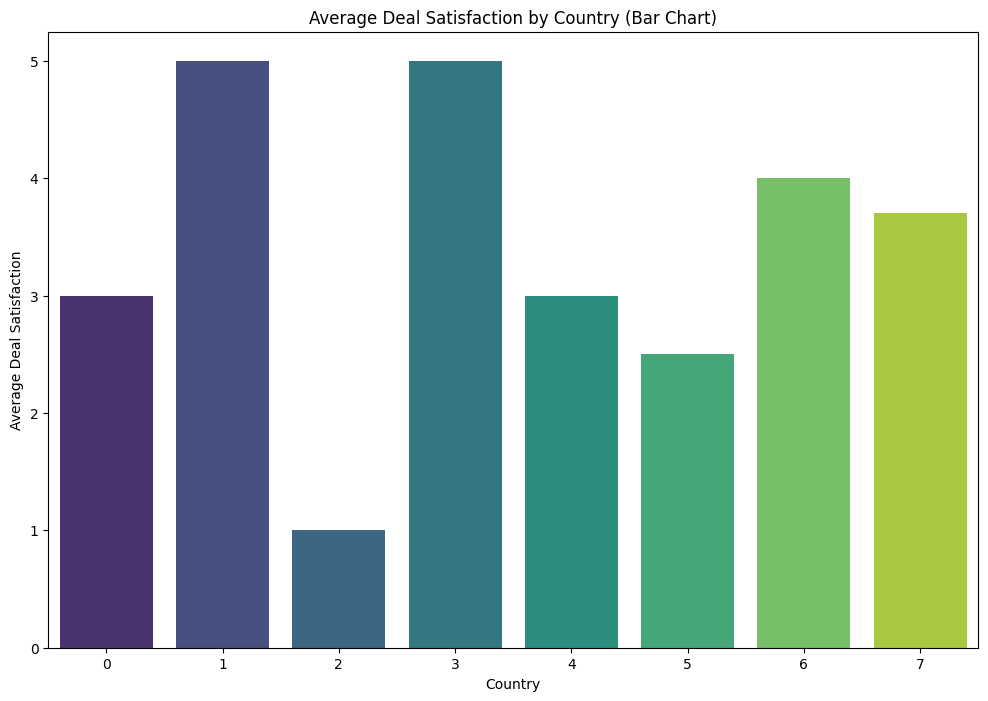

In [158]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')

plt.title('Average Deal Satisfaction by Country (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Average Deal Satisfaction')
plt.show()

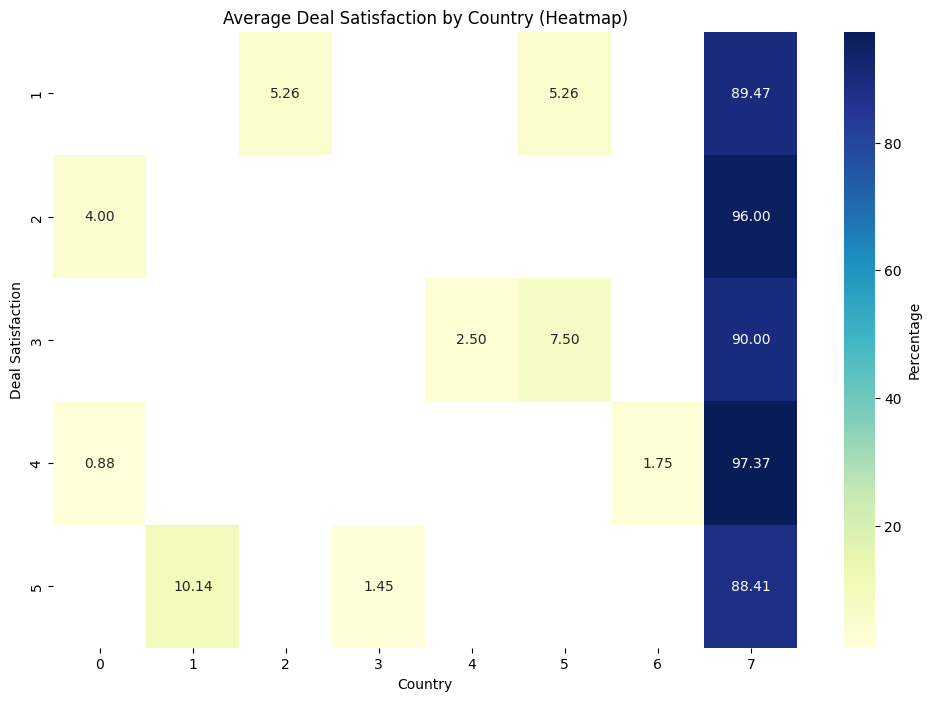

In [159]:
heatmap_data = data.groupby(['country', 'deal_satisfaction']).size().unstack().T
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100  # Convert to percentages

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})

plt.title('Average Deal Satisfaction by Country (Heatmap)')
plt.xlabel('Country')
plt.ylabel('Deal Satisfaction')
plt.show()

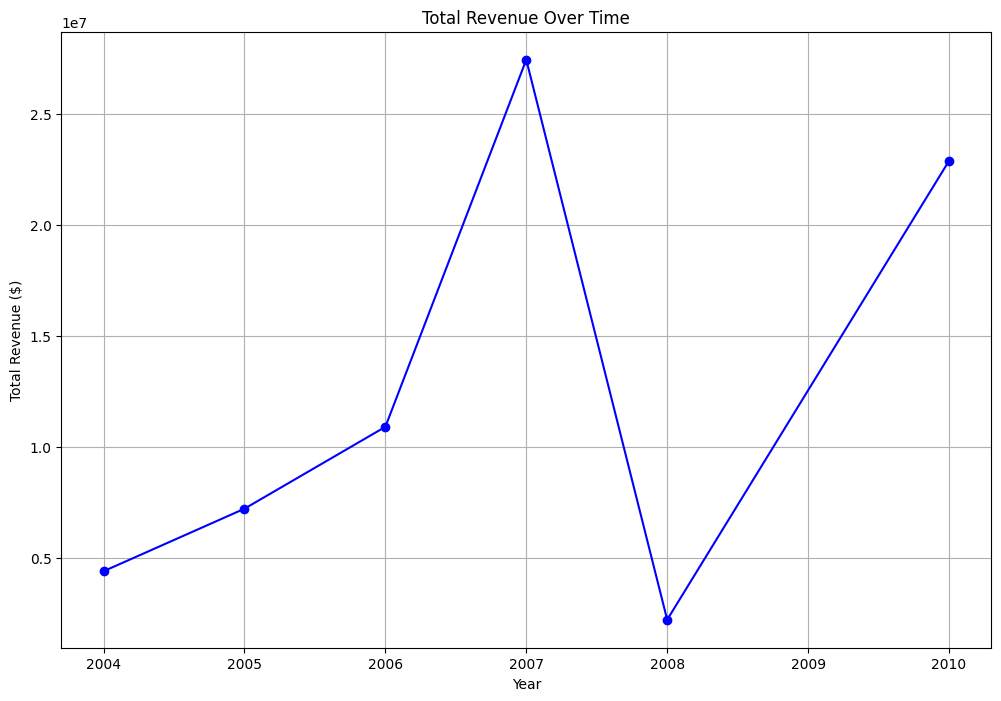

In [160]:
plt.figure(figsize=(12, 8))
data['datesale_year'] = data['datesale'].dt.year
revenue_per_year = data.groupby('datesale_year')['price'].sum()

revenue_per_year.plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


/tmp/ipython-input-161-3882704145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')


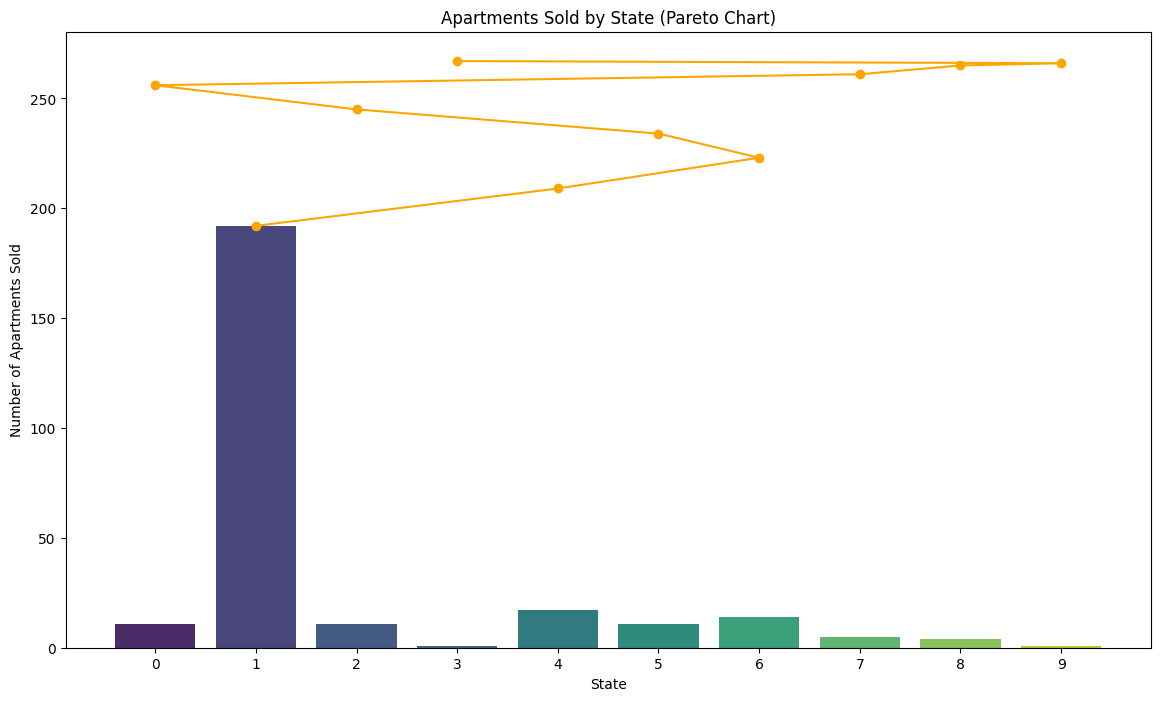

In [161]:
plt.figure(figsize=(14, 8))
state_counts = data['state'].value_counts()
state_cumulative = state_counts.cumsum()

sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')
plt.plot(state_cumulative.index, state_cumulative, color='orange', marker='o')

plt.title('Apartments Sold by State (Pareto Chart)')
plt.xlabel('State')
plt.ylabel('Number of Apartments Sold')
plt.show()

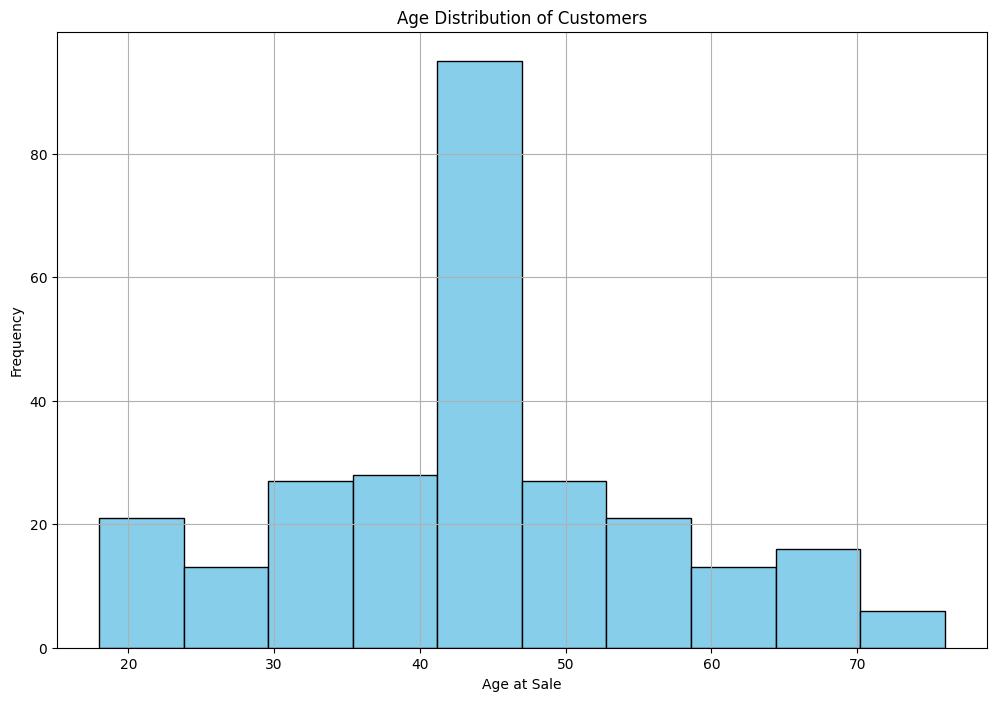

In [162]:
plt.figure(figsize=(12, 8))
plt.hist(data['age_at_sale'], bins=10, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Customers')
plt.xlabel('Age at Sale')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

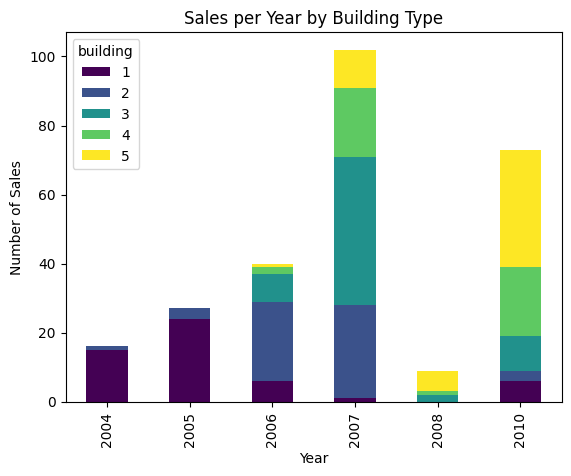

In [163]:
plt.figure(figsize=(14, 8))
building_type_sales = data.groupby(['datesale_year', 'building'])['customerid'].count().unstack()

building_type_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sales per Year by Building Type')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In [164]:
# Filter data for building type 1
building_type_1_data = data[data['building'] == 1]

# Calculate the average area for building type 1
average_area_building_type_1 = building_type_1_data['area'].mean()

print(f"The average area of building type 1 is: {average_area_building_type_1} square feet")

The average area of building type 1 is: 928.0388461538461 square feet


In [165]:
property_type_counts = data['type'].value_counts()
(print(property_type_counts))
# Find the property type with the highest count
most_common_property_type = property_type_counts.idxmax()

print(f"The most common property type sold is: {most_common_property_type}")

type
0    259
1      8
Name: count, dtype: int64
The most common property type sold is: 0


In [166]:
# Group by building and calculate the average property price
average_price_by_building = data.groupby('building')['price'].mean()

# Find the building with the highest average price
highest_avg_price_building = average_price_by_building.idxmax()

print(f"The building with the highest average property price is: {highest_avg_price_building}")

The building with the highest average property price is: 4


In [167]:
# 4 is the actual encoded value for Mexico in the 'country' column
mexico_properties = data[data['country'] == 4]

# Calculate the average cost of a building in Mexico
average_cost_in_mexico = mexico_properties['price'].mean()

print(f"The average cost of a building in Mexico is: {average_cost_in_mexico}")

The average cost of a building in Mexico is: 338181.18


In [168]:

state_property_counts = data['state'].value_counts()

# Find the second-highest number of properties sold
second_highest_state = state_property_counts.index[1]

print("State with the second-highest number of properties sold:", second_highest_state)

State with the second-highest number of properties sold: 4


In [169]:
# Define the price intervals
price_intervals = pd.cut(data['price'], bins=10)

# Count the number of unsold properties in the last interval
unsold_properties_last_interval = data[data['status'] == 0]['price'][price_intervals == price_intervals.iloc[-1]].count()

print("Number of unsold properties in the last interval:", unsold_properties_last_interval)

Number of unsold properties in the last interval: 28
